In [2]:
# Importar las bibliotecas
import pandas as pd
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')
# Ruta donde se guardará el archivo en Google Drive
ruta_archivo = '/content/drive/My Drive/Tesis/data analisis.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Instalación de librerías
!pip install --upgrade numpy scipy scikit-learn catboost imblearn

# Librerías básicas de manejo y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

# Librerías para división de datos
from sklearn.model_selection import train_test_split

# Librerías para modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Librerías para evaluación de modelos
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_curve, auc
)


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


## **PREPROCESAMIENTO DE LA DATA**

In [5]:

# Definir equipos según su ubicación geográfica
EQUIPOS_SIN_ALTURA = [
    '9 de Octubre FC', 'Barcelona SC', 'CS Emelec', 'Delfin SC',
    'Fuerza Amarilla SC', 'Guayaquil City FC', 'LDU Portoviejo',
    'Manta FC', 'Orense SC'
]

EQUIPOS_CON_ALTURA = [
    'CD Independiente del Valle', 'LDU de Quito', 'CD El Nacional',
    'Libertad FC', 'Imbabura SC', 'CD Macara', 'SD Aucas',
    'Mushuc Runa SC', 'CD Universidad Catolica', 'Cumbaya FC',
    'CD Tecnico Universitario', 'CD Cuenca', 'Gualaceo SC',
    'CD Olmedo', 'CD America Quito'
]

# Leer y preparar los datos
df = pd.read_excel(ruta_archivo)

# Calcular Saldo de Goles
df['Saldo_Goles'] = df['GF'] - df['GC']

# Codificar la formación del equipo visitante
encoder = OneHotEncoder(sparse_output=False)
formaciones_encoded = encoder.fit_transform(df[['Formación Visitante']])
formaciones_df = pd.DataFrame(
    formaciones_encoded,
    columns=[f"{categoria}" for categoria in encoder.categories_[0]]
)

# Codificar resultados del partido
resultados_df = pd.get_dummies(df['Resultado'], prefix='Resultado')

# Combinar los datos codificados con el dataframe original
df = pd.concat([df, formaciones_df, resultados_df], axis=1)

# Función para clasificar partidos según ubicación de equipos
def clasificar_partido(row):
    local = row['Local']
    visitante = row['Visitante']

    if local in EQUIPOS_CON_ALTURA and visitante in EQUIPOS_CON_ALTURA:
        return 'Altura vs Altura'
    elif local in EQUIPOS_SIN_ALTURA and visitante in EQUIPOS_SIN_ALTURA:
        return 'Costa vs Costa'
    elif local in EQUIPOS_CON_ALTURA and visitante in EQUIPOS_SIN_ALTURA:
        return 'Altura vs Costa'
    elif local in EQUIPOS_SIN_ALTURA and visitante in EQUIPOS_CON_ALTURA:
        return 'Costa vs Altura'
    else:
        return 'Desconocido'

# Aplicar la clasificación al dataframe
df['clasificacion_del_partido'] = df.apply(clasificar_partido, axis=1)

# Separar el dataframe según la clasificación del partido
df_sierra_costa = df[df['clasificacion_del_partido'] == 'Altura vs Costa']
df_costa_sierra = df[df['clasificacion_del_partido'] == 'Costa vs Altura']
df_sierra_sierra = df[df['clasificacion_del_partido'] == 'Altura vs Altura']
df_costa_costa = df[df['clasificacion_del_partido'] == 'Costa vs Costa']


## **IMPLEMENTACION DE MODELOS**

Entrenando RLM...
Entrenando RF...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Entrenando SVM...
Entrenando MLP...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

Entrenando XGBoost...
Entrenando LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9
[LightGBM] [Info] Number of data points in the train set: 301, number of used features: 3
[LightGBM] [Info] Start training from score -0.619514
[LightGBM] [Info] Start training from score -1.264459
[LightGBM] [Info] Start training from score -1.718126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Resultados Comparativos:

RLM:
  Accuracy: 0.5625
  Precision: 0.5539
  Recall: 0.5625
  F1-score: 0.4390

RF:
  Accuracy: 0.5625
  Precision: 0.5539
  Recall: 0.5625
  F1-score: 0.4390

SVM:
  Accuracy: 0.5417
  Precision: 0.4583
  Recall: 0.5417
  F1-score: 0.4249

MLP:
  Accuracy: 0.5625
  Precision: 0.5539
  Recall: 0.5625
  F1-score: 0.4390

XGBoost:
  Accuracy: 0.5625
  Precision: 0.5539
  Recall: 0.5625
  F1-score: 0.4390

LightGBM:
  Accuracy: 0.5208
  Precision: 0.2713
  Recall: 0.5208
  F1-score: 0.3567

CatBoost:
  Accuracy: 0.5625
  Precision: 0.5539
  Recall: 0.5625
  F1-score: 0.4390


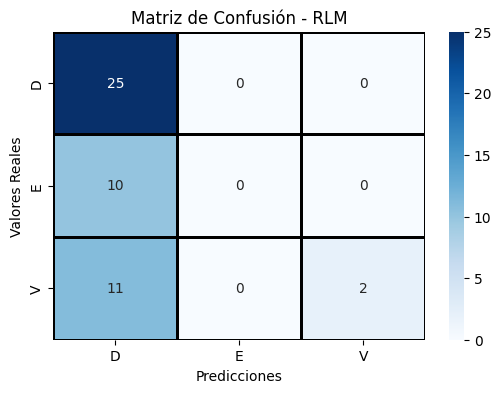

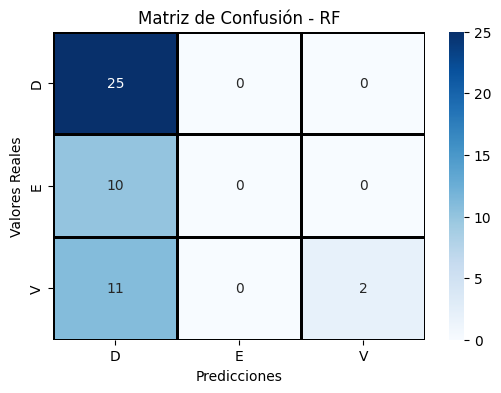

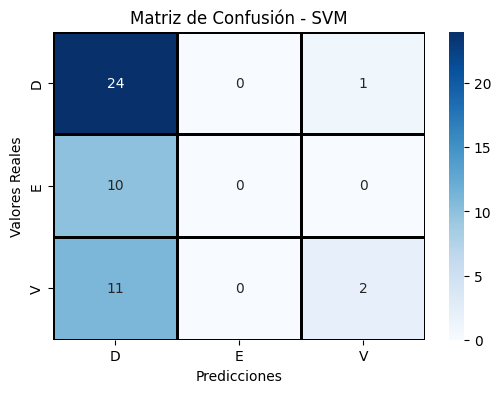

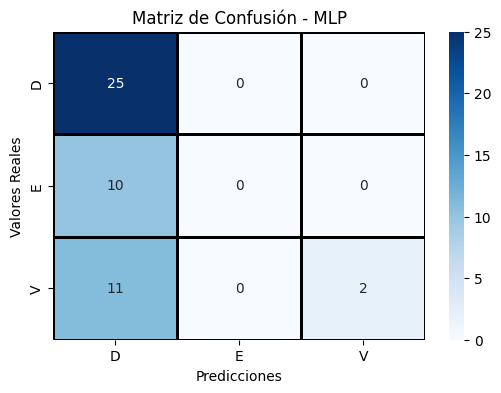

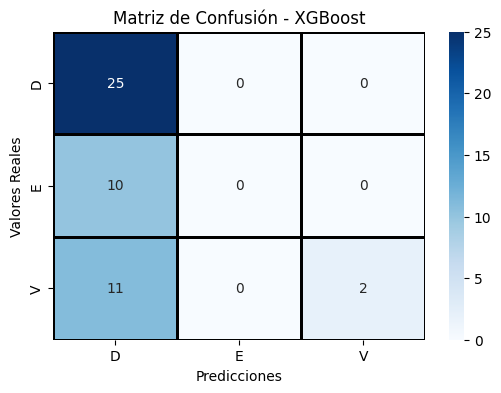

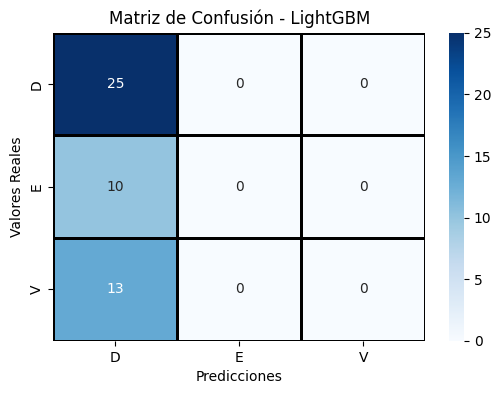

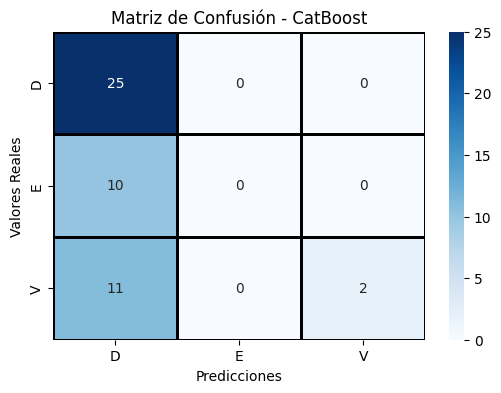

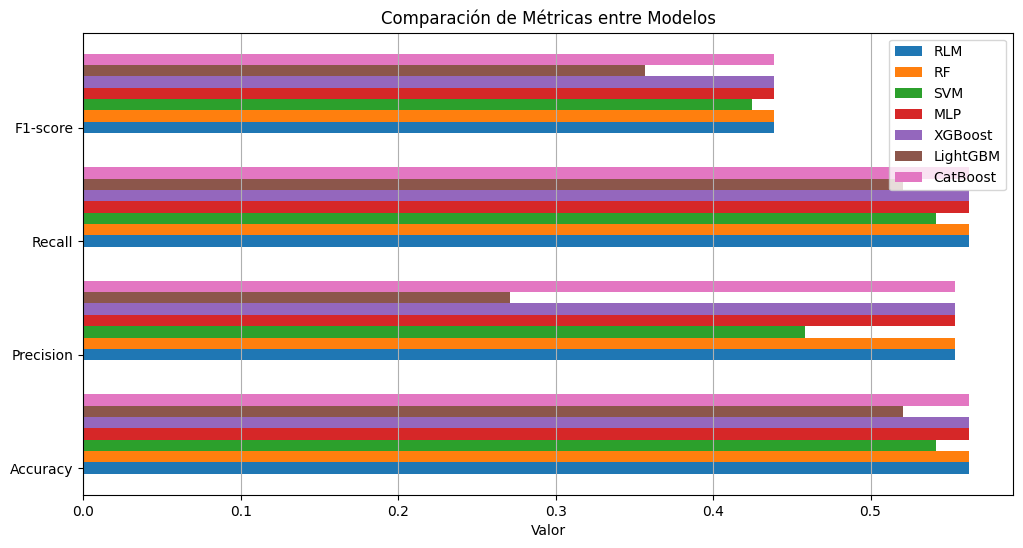

In [ ]:
# Función para evaluar modelos
def evaluar_modelo(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-score": f1_score(y_true, y_pred, average='weighted')
    }

# Cargar y preparar dataset
data_evaluar = df_sierra_costa.copy()
le = LabelEncoder()
data_evaluar["Resultado"] = le.fit_transform(data_evaluar["Resultado"])

# Definir variables predictoras y objetivo

x_variables = [
    'Altura', '3-1-4-2', '3-4-1-2', '3-4-3', '3-5-2', '4-1-4-1', '4-2-3-1',
    '4-3-1-2', '4-3-2-1', '4-3-3', '4-4-1-1', '4-4-2', '4-5-1', '5-3-2', '5-4-1'
]

y_variable = "Resultado"
X = data_evaluar[x_variables]
y = data_evaluar[y_variable]

# División en conjunto de entrenamiento y prueba
test_data = data_evaluar[(data_evaluar['Fecha'].dt.year == 2024)]
train_data = data_evaluar[data_evaluar['Fecha'].dt.year != 2024]

X_train, y_train = train_data[x_variables], train_data[y_variable]
X_test, y_test = test_data[x_variables], test_data[y_variable]

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir modelos
modelos = {
    "RLM": LogisticRegression(max_iter=100, random_state=42),
    "RF": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=200, learning_rate=0.05, depth=5, verbose=0, random_seed=42)
}

resultados = {}
predicciones = {}

for nombre, modelo in modelos.items():
    print(f"Entrenando {nombre}...")
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    predicciones[nombre] = y_pred
    resultados[nombre] = evaluar_modelo(y_test, y_pred)

# Mostrar resultados
print("\nResultados Comparativos:")
for nombre, metricas in resultados.items():
    print(f"\n{nombre}:")
    for metrica, valor in metricas.items():
        print(f"  {metrica}: {valor:.4f}")

# Función para visualizar la matriz de confusión
def mostrar_matriz_confusion(modelo, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.title(f'Matriz de Confusión - {modelo}')
    plt.show()

# Mostrar matrices de confusión
for nombre, y_pred in predicciones.items():
    mostrar_matriz_confusion(nombre, y_test, y_pred)

# Comparación de métricas
metricas = ["Accuracy", "Precision", "Recall", "F1-score"]
valores_modelos = {nombre: list(metricas.values()) for nombre, metricas in resultados.items()}

x = np.arange(len(metricas))
width = 0.1
plt.figure(figsize=(12, 6))
for i, (nombre, valores) in enumerate(valores_modelos.items()):
    plt.barh(x + i * width, valores, height=width, label=nombre)
plt.yticks(x, metricas)
plt.xlabel("Valor")
plt.title("Comparación de Métricas entre Modelos")
plt.legend()
plt.grid(axis='x')
plt.show()


## **MODELOS CON NIVELACION DE PESOS**

Entrenando Regresión Logística...
Entrenando Random Forest...
Entrenando SVM...
Entrenando MLP...
Entrenando XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:45:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Entrenando LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 301, number of used features: 4
[LightGBM] [Info] Start training from score -0.619514
[LightGBM] [Info] Start training from score -1.264459
[LightGBM] [Info] Start training from score -1.718126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Resultados Comparativos:

Regresión Logística:
  Accuracy: 0.3333
  Precision: 0.3640
  Recall: 0.3333
  F1-score: 0.3173

Random Forest:
  Accuracy: 0.2708
  Precision: 0.3398
  Recall: 0.2708
  F1-score: 0.2939

SVM:
  Accuracy: 0.2292
  Precision: 0.3114
  Recall: 0.2292
  F1-score: 0.1850

MLP:
  Accuracy: 0.4792
  Precision: 0.5376
  Recall: 0.4792
  F1-score: 0.4037

XGBoost:
  Accuracy: 0.5208
  Precision: 0.5984
  Recall: 0.5208
  F1-score: 0.4591

LightGBM:
  Accuracy: 0.5208
  Precision: 0.4924
  Recall: 0.5208
  F1-score: 0.4002

CatBoost:
  Accuracy: 0.3125
  Precision: 0.3711
  Recall: 0.3125
  F1-score: 0.3342


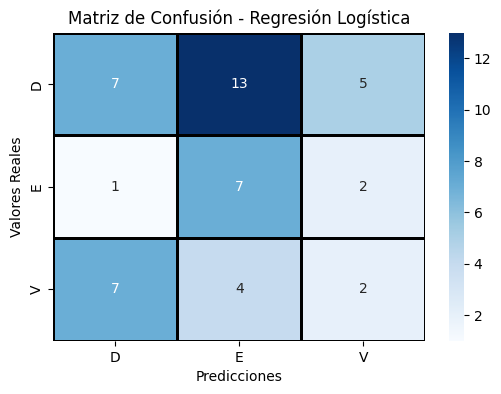

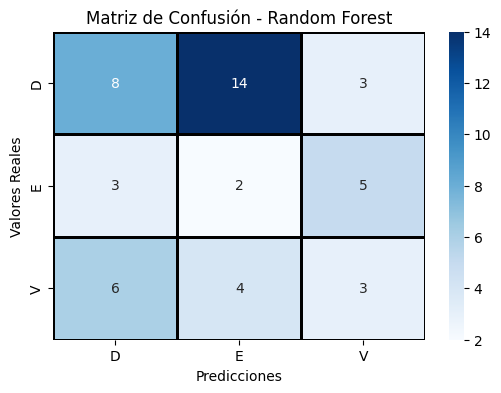

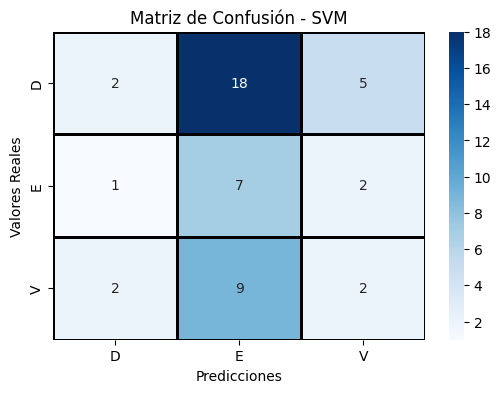

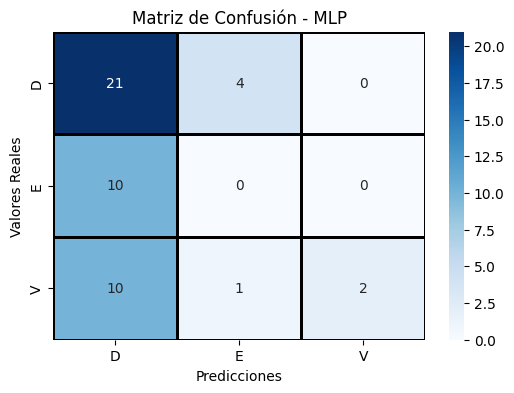

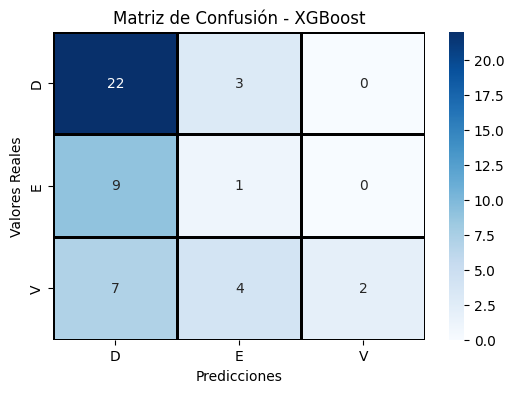

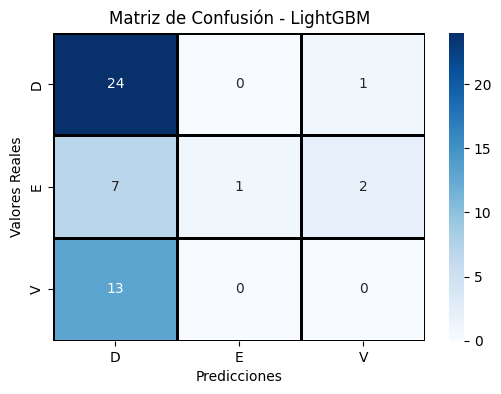

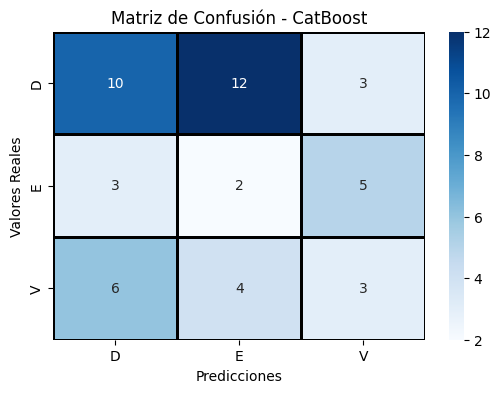

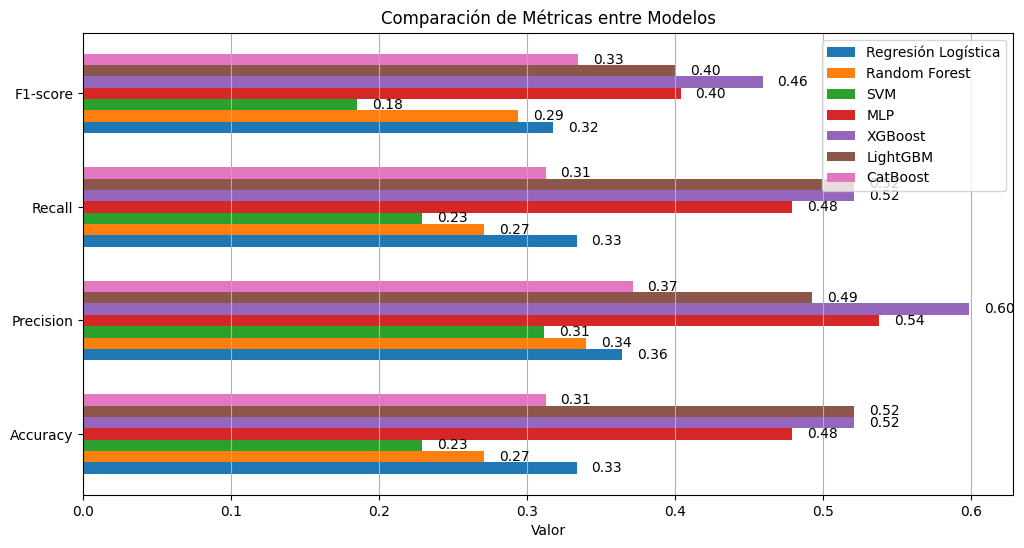

In [ ]:
# Función para evaluar modelos
def evaluar_modelo(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-score": f1_score(y_true, y_pred, average='weighted')
    }

# Cargar y preparar dataset
data_evaluar = df_sierra_costa.copy()
le = LabelEncoder()
data_evaluar["Resultado"] = le.fit_transform(data_evaluar["Resultado"])

# Mapping de clases
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print("Mapping de clases:", class_mapping)

# Definir pesos manuales
manual_class_weights = {class_mapping.get('D', 0): 1.0, class_mapping.get('E', 1): 2.0, class_mapping.get('V', 2): 3.0}

# Definir variables predictoras y objetivo
x_variables = [
    'Altura', '3-1-4-2', '3-4-1-2', '3-4-3', '3-5-2', '4-1-4-1', '4-2-3-1',
    '4-3-1-2', '4-3-2-1', '4-3-3', '4-4-1-1', '4-4-2', '4-5-1', '5-3-2', '5-4-1'
]

y_variable = "Resultado"
X = data_evaluar[x_variables]
y = data_evaluar[y_variable]

# División en conjunto de entrenamiento y prueba
test_data = data_evaluar[data_evaluar['Fecha'].dt.year == 2024]
train_data = data_evaluar[data_evaluar['Fecha'].dt.year != 2024]

X_train, y_train = train_data[x_variables], train_data[y_variable]
X_test, y_test = test_data[x_variables], test_data[y_variable]

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir modelos con pesos manuales
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42, class_weight=manual_class_weights),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight=manual_class_weights),
    "SVM": SVC(kernel='linear', probability=True, random_state=42, class_weight=manual_class_weights),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, scale_pos_weight=manual_class_weights.get(class_mapping.get('E', 1), 1)),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42, scale_pos_weight=manual_class_weights.get(class_mapping.get('E', 1), 1)),
    "CatBoost": CatBoostClassifier(n_estimators=200, learning_rate=0.05, depth=5, verbose=0, random_seed=42, class_weights=list(manual_class_weights.values()))
}

resultados = {}
predicciones = {}

for nombre, modelo in modelos.items():
    print(f"Entrenando {nombre}...")
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    predicciones[nombre] = y_pred
    resultados[nombre] = evaluar_modelo(y_test, y_pred)

# Mostrar resultados
print("\nResultados Comparativos:")
for nombre, metricas in resultados.items():
    print(f"\n{nombre}:")
    for metrica, valor in metricas.items():
        print(f"  {metrica}: {valor:.4f}")

# Mostrar matrices de confusión
for nombre, y_pred in predicciones.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.show()

# Comparación de métricas
metricas = ["Accuracy", "Precision", "Recall", "F1-score"]
valores_modelos = {nombre: list(metrica.values()) for nombre, metrica in resultados.items()}

x = np.arange(len(metricas))
width = 0.1
plt.figure(figsize=(12, 6))
for i, (nombre, valores) in enumerate(valores_modelos.items()):
    bars = plt.barh(x + i * width, valores, height=width, label=nombre)
    for bar in bars:
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', ha='left', va='center')

plt.yticks(x + (len(valores_modelos) - 1) * width / 2, metricas)
plt.xlabel("Valor")
plt.title("Comparación de Métricas entre Modelos")
plt.legend()
plt.grid(axis='x')
plt.show()


## **MODELOS CON DATOS SINTETICOS SMOTE**

Entrenando Regresión Logística...
Entrenando Random Forest...
Entrenando SVM...
Entrenando MLP...
Entrenando XGBoost...
Entrenando LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Entrenando CatBoost...

Resultados Comparativos:

Regresión Logística:
  Accuracy: 0.2083
  Precision: 0.3050
  Recall: 0.2083
  F1-score: 0.2025

Random Forest:
  Accuracy: 0.3542
  Precision: 0.4169
  Recall: 0.3542
  F1-score: 0.3782

SVM:
  Accuracy: 0.2500
  Precision: 0.3176
  Recall: 0.2500
  F1-score: 0.2123

MLP:
  Accuracy: 0.3125
  Precision: 0.3954
  Recall: 0.3125
  F1-score: 0.3293

XGBoost:
  Accuracy: 0.3125
  Precision: 0.3914
  Recall: 0.3125
  F1-score: 0.3407

LightGBM:
  Accuracy: 0.2917
  Precision: 0.3210
  Recall: 0.2917
  F1-score: 0.2996

CatBoost:
  Accuracy: 0.3333
  Precision: 0.4141
  Recall: 0.3333
  F1-score: 0.3629


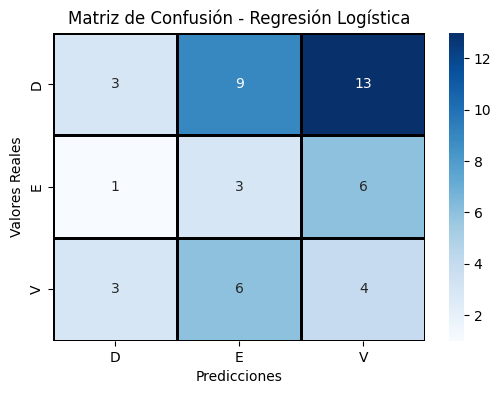

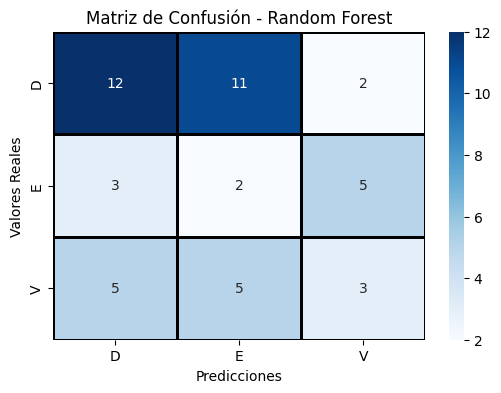

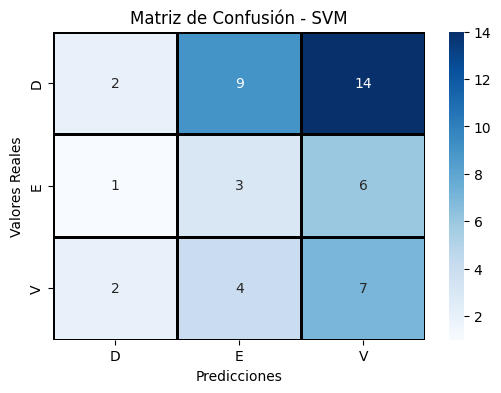

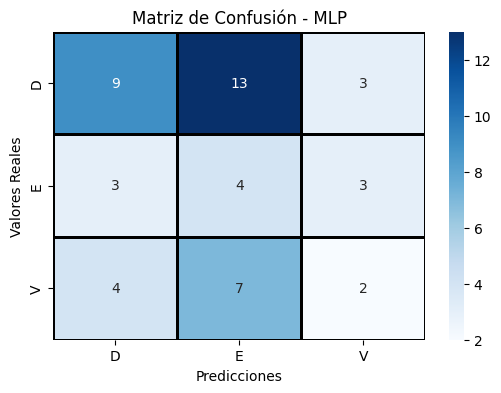

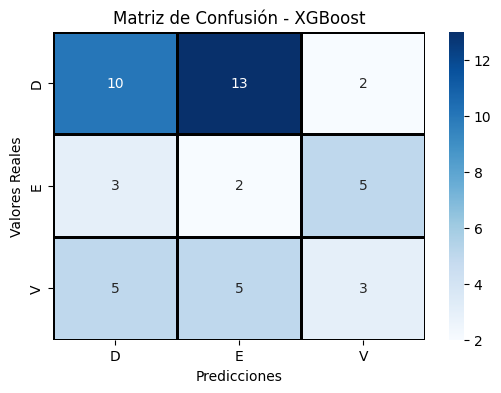

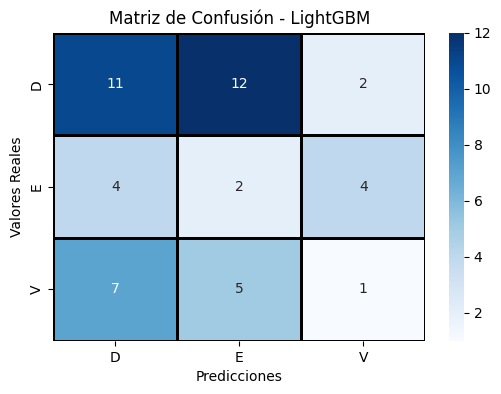

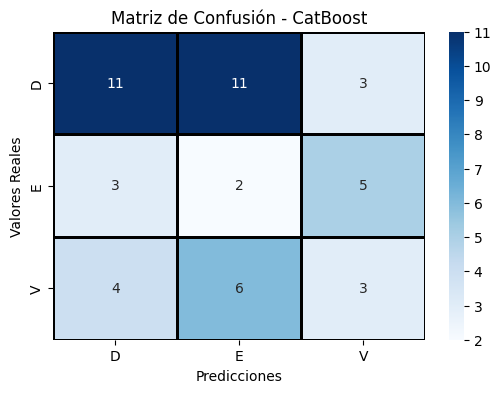

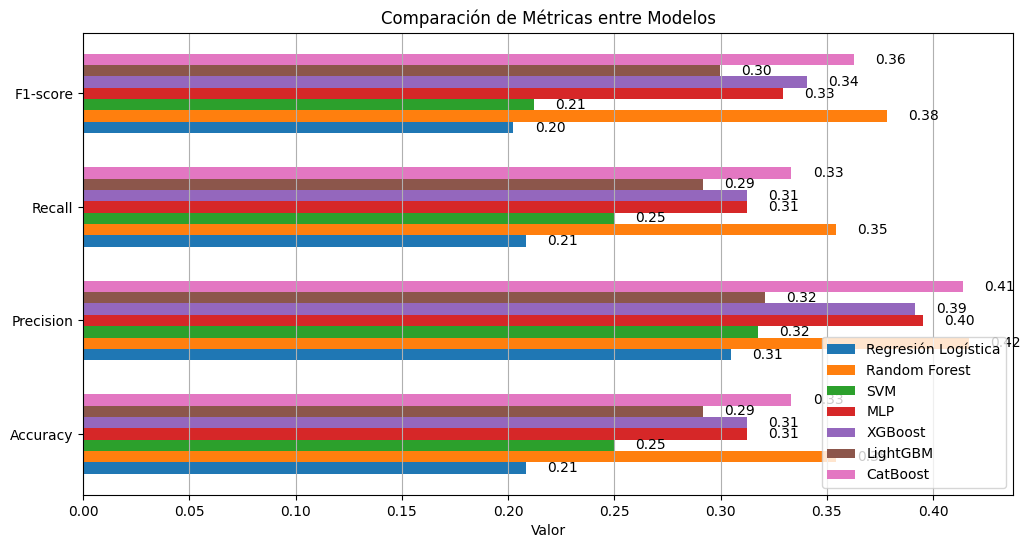

In [7]:
# Función para evaluar modelos
def evaluar_modelo(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-score": f1_score(y_true, y_pred, average='weighted')
    }

# Cargar y preparar dataset
data_evaluar = df_sierra_costa.copy()
le = LabelEncoder()
data_evaluar["Resultado"] = le.fit_transform(data_evaluar["Resultado"])

# Definir variables predictoras y objetivo
x_variables = [
    'Altura', '3-1-4-2', '3-4-1-2', '3-4-3', '3-5-2', '4-1-4-1', '4-2-3-1',
    '4-3-1-2', '4-3-2-1', '4-3-3', '4-4-1-1', '4-4-2', '4-5-1', '5-3-2', '5-4-1']

y_variable = "Resultado"
X = data_evaluar[x_variables]
y = data_evaluar[y_variable]

# División en conjunto de entrenamiento y prueba
test_data = data_evaluar[data_evaluar['Fecha'].dt.year == 2024]
train_data = data_evaluar[data_evaluar['Fecha'].dt.year != 2024]

X_train, y_train = train_data[x_variables], train_data[y_variable]
X_test, y_test = test_data[x_variables], test_data[y_variable]

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Definir modelos
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=200, learning_rate=0.05, depth=5, verbose=0, random_seed=42)
}

resultados = {}
predicciones = {}

for nombre, modelo in modelos.items():
    print(f"Entrenando {nombre}...")
    modelo.fit(X_train_scaled, y_train_smote)
    y_pred = modelo.predict(X_test_scaled)
    predicciones[nombre] = y_pred
    resultados[nombre] = evaluar_modelo(y_test, y_pred)

# Mostrar resultados
print("\nResultados Comparativos:")
for nombre, metricas in resultados.items():
    print(f"\n{nombre}:")
    for metrica, valor in metricas.items():
        print(f"  {metrica}: {valor:.4f}")

# Mostrar matrices de confusión
for nombre, y_pred in predicciones.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.show()

# Comparación de métricas
metricas = ["Accuracy", "Precision", "Recall", "F1-score"]
valores_modelos = {nombre: list(metrica.values()) for nombre, metrica in resultados.items()}

x = np.arange(len(metricas))
width = 0.1
plt.figure(figsize=(12, 6))
for i, (nombre, valores) in enumerate(valores_modelos.items()):
    bars = plt.barh(x + i * width, valores, height=width, label=nombre)
    for bar in bars:
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', ha='left', va='center')

plt.yticks(x + (len(valores_modelos) - 1) * width / 2, metricas)
plt.xlabel("Valor")
plt.title("Comparación de Métricas entre Modelos")
plt.legend()
plt.grid(axis='x')
plt.show()
